In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
train_data=pd.read_csv("C:\\Users\\phvic\\fraudTest.csv")

In [3]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
missing_values = train_data.isnull().sum()
print(missing_values)

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
dim(train_data)

In [ ]:
colnames(train_data)

In [ ]:
table(train_data$is_fraud

In [ ]:
summary(train_data$amt)

In [ ]:
var(train_data$amt)
sd(train_data$amt)

In [ ]:
train_data$trans_date_trans_time<-as.Date(train_data$trans_date_trans_time)


In [ ]:
str(train_data)

In [ ]:
# Credting new features from date column for better analysis
creditcard$tran_year<-as.numeric(format(train_data$trans_date_trans_time, format="%Y"))
creditcard$tran_month<-as.numeric(format(train_data$trans_date_trans_time, format="%m"))
creditcard$tran_date<-as.numeric(format(train_data$trans_date_trans_time, format="%d"))

In [ ]:
train_data$dob<-as.Date(train_data$dob)

In [ ]:
train_data$gender<-ifelse(train_data$gender=="F",1,0)

In [ ]:
str(train_data)

In [ ]:
head(train_data)

In [ ]:
ncol9(train_data)
length(unique(train_data$tran_date))
length(unique(train_data$tran_month))
length(unique(train_data$tran_year))

In [ ]:
summary(train_data)

In [ ]:
# univariate analysis
barplot(table(train_data$is_fraud),col="blue")

In [ ]:
hist(train_data$amt, 
     main="Histogram for card Amount", 
     xlab="card Amount", 
     border="blue", 
     col="maroon",
     las=1, 
     breaks=2000, prob = TRUE)

In [ ]:
boxplot(train_data$amt, col='maroon',xlab = 'credit card amount', main = 'Box Plot for credit card Amount')

In [ ]:
train_data$amt=scale(train_data$amt)
summary(train_data$amt)

In [ ]:
hist(train_data$amt, 
     main="Histogram for card Amount", 
     xlab="Card Amount", 
     border="blue", 
     col="maroon",
     las=1, 
     breaks=200, prob = TRUE)

In [ ]:
boxplot(train_data$amt, col='maroon',xlab = 'credit card amount', main = 'Box Plot for credit card Amount')

In [ ]:
colnames(train_data)

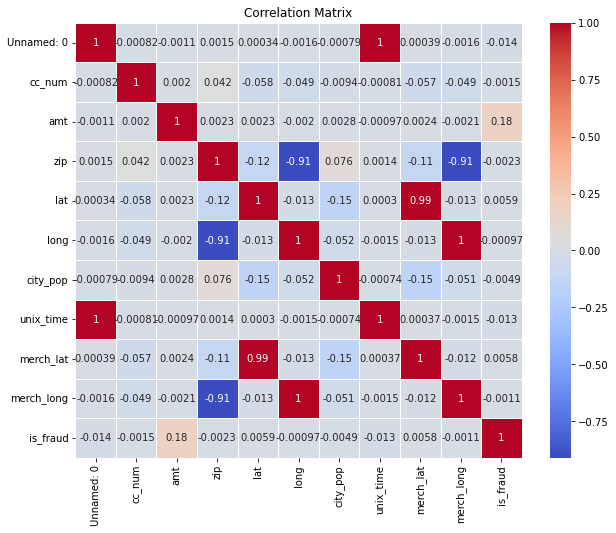

In [5]:
# Correlation matrix
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
x_train = train_data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']]
y_train = train_data['is_fraud']


In [8]:
test_data=pd.read_csv("C:\\Users\\phvic\\fraudTest.csv")

In [9]:
x_test=test_data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']]
y_test = test_data['is_fraud']


Model Training

In [10]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)

RandomForestClassifier()

In [13]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

Model Evaluation

In [14]:
logistic_predictions = logistic_model.predict(x_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_classification_report = classification_report(y_test, logistic_predictions)
logistic_roc_auc = roc_auc_score(y_test, logistic_predictions)

In [15]:
decision_tree_predictions = logistic_model.predict(x_test)
decision_tree_accuracy = accuracy_score(y_test, logistic_predictions)
decision_tree_classification_report = classification_report(y_test, logistic_predictions)
decision_tree_roc_auc = roc_auc_score(y_test, logistic_predictions)

In [16]:
print(decision_tree_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [17]:
print(decision_tree_roc_auc)

0.49986271031515206


In [18]:
random_forest_predictions = logistic_model.predict(x_test)
random_forest_accuracy = accuracy_score(y_test, logistic_predictions)
random_forest_classification_report = classification_report(y_test, logistic_predictions)
random_forest_roc_auc = roc_auc_score(y_test, logistic_predictions)

Hyper Parameter Tunning

In [19]:
param_grid_decision_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_decision_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_decision_tree, cv=5)
grid_search_decision_tree.fit(x_train, y_train)

# Get the best hyperparameters
best_params_decision_tree = grid_search_decision_tree.best_params_
best_decision_tree_model = grid_search_decision_tree.best_estimator_

In [ ]:
param_grid_random_forest = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_random_forest = GridSearchCV(RandomForestClassifier(), param_grid_random_forest, cv=5)
grid_search_random_forest.fit(x_train, y_train)

# Get the best hyperparameters
best_params_random_forest = grid_search_random_forest.best_params_
best_random_forest_model = grid_search_random_forest.best_estimator_
